# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, ExponentialFitter
from lifelines.utils import k_fold_cross_validation
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

# Reading and transforming the data

In [3]:
data= pd.read_csv('telco.csv')
clvdata = pd.read_csv('telco.csv')
data.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [4]:
data = data.copy()
data.drop(['ID'], axis=1, inplace=True)
cols = ['region', 'retire', 'marital', 'ed', 'gender', 'voice', 'internet', 'custcat', 'churn', 'forward']
data = data.copy()
data = pd.get_dummies(data, columns=cols, drop_first=True)
data = data.rename(columns={'churn_Yes': 'churn'})
data.head()

,tenure,age,address,income,region_Zone 2,region_Zone 3,retire_Yes,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,gender_Male,voice_Yes,internet_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn,forward_Yes
0,13,44,9,64,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
1,11,33,7,136,False,True,False,False,False,False,True,False,True,True,False,False,False,True,True,True
2,68,52,24,116,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,33,33,12,33,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
4,23,30,9,30,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True


# Fitting AFT Models

In [5]:
weibull_model = WeibullAFTFitter()
log_norm_model = LogNormalAFTFitter()
log_logistic_model = LogLogisticAFTFitter()


### Weibull 

In [6]:
weibull = weibull_model.fit(data, duration_col='tenure', event_col='churn')
weibull_prediction = weibull.predict_survival_function(data).T
weibull_prediction_avg = weibull_prediction.mean()
weibull.print_summary()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2023-11-27 16:01:37 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service           

### Log Normal

In [7]:
log_norm = log_norm_model.fit(data, duration_col='tenure', event_col='churn')
log_norm_prediction = log_norm.predict_survival_function(data).T
log_norm_prediction_avg = log_norm_prediction.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-27 16:01:37 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

### Log Logistic

In [8]:
log_logistic = log_logistic_model.fit(data, duration_col='tenure', event_col='churn')
log_logistic_prediction = log_logistic.predict_survival_function(data).T
log_logistic_prediction_avg = log_logistic_prediction.mean()
log_logistic.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2023-11-27 16:01:38 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005    

### Compare the 3 models

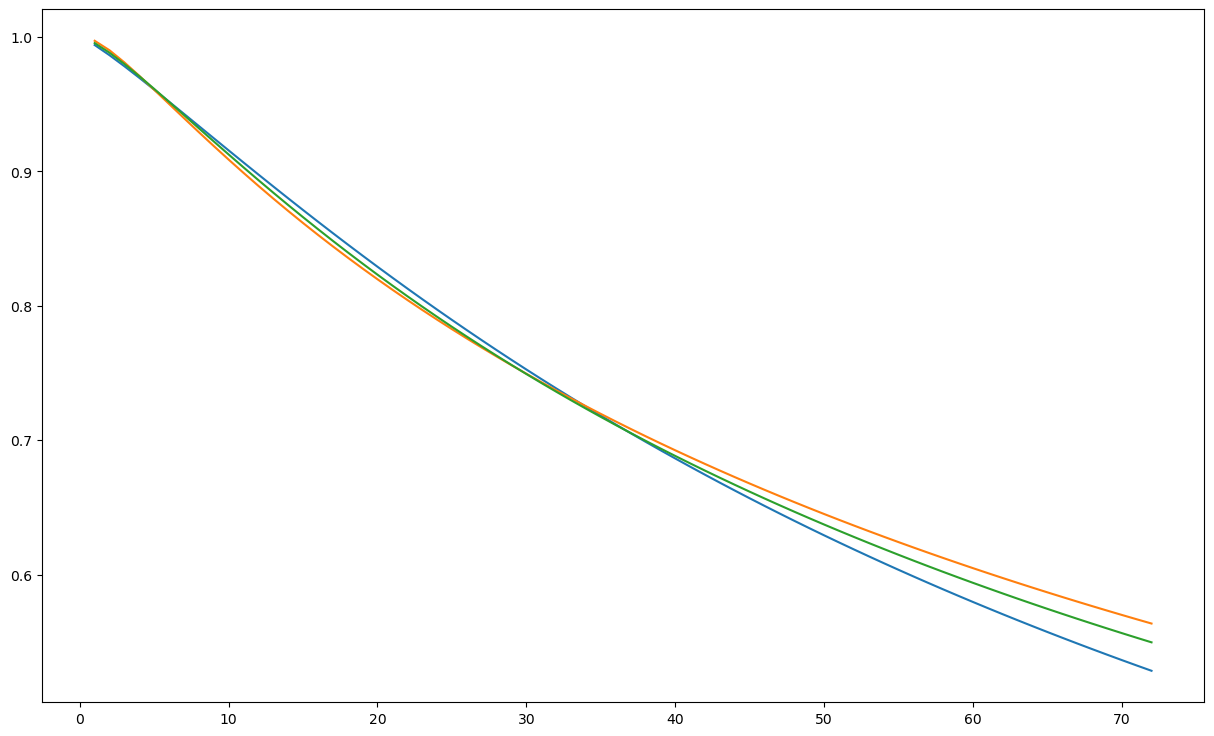

In [9]:
plt.figure(figsize=(15,9))
plt.plot(weibull_prediction_avg, label='Weibull')
plt.plot(log_norm_prediction_avg, label='LogNorm')
plt.plot(log_logistic_prediction_avg, label='LogLogistic')
plt.show()

The Akaike Information Criterion (AIC) helps to figure out how well a model works. It takes into account both the goodness of fit of the model and the number of parameters used in the model. 

In [10]:

print(f'Log-Normal AIC: {log_norm.AIC_}')
print(f'Log-Logistic AIC: {log_logistic.AIC_}')
print(f'Weibull AIC: {weibull.AIC_}')

scores = { 'Log-normal': log_norm.AIC_, 'Log-logistic': log_logistic.AIC_, 'Weibull': weibull.AIC_}
print(f'\nThe best model based on AIC scores is: \033[1m{min(scores, key=scores.get)}\033[0m')

Log-Normal AIC: 2954.0240102517128
Log-Logistic AIC: 2956.2085614433336
Weibull AIC: 2964.343248083881

The best model based on AIC scores is: Log-normal


In this case, it is the Log-Normal model, which has an AIC score of 2954.0240102517128. Lower AIC scores indicate a better balance of model fit and complexity, making the Log-Normal model the preferable choice among the three based on these scores.

The complexity of the model is another important factor which is described by the number of the parameters the model has. Log-Normal and Log-Logistic models have both three parameters, while weibull has two. So, weibull model is the least complex model from these 3.



> However, I will continue with Log -normal Model

# Plot

### Keep significant features

Taking those features as significant that are 99% significant. Here is the list:

In [11]:
significant_columns = ["address", "age", "internet_Yes", "marital_Unmarried", "tenure", "churn", "custcat_E-service", "custcat_Plus service", "custcat_Total service"]

In [12]:

significant_data = data[significant_columns]
significant_data.head()

,address,age,internet_Yes,marital_Unmarried,tenure,churn,custcat_E-service,custcat_Plus service,custcat_Total service
0,9,44,False,False,13,True,False,False,False
1,7,33,False,False,11,True,False,False,True
2,24,52,False,False,68,False,False,True,False
3,12,33,False,True,33,True,False,False,False
4,9,30,False,False,23,False,False,True,False


In [13]:
log_norm = log_norm_model.fit(significant_data, duration_col='tenure', event_col='churn')
log_norm_prediction = log_norm.predict_survival_function(significant_data).T
log_norm_prediction_avg = log_norm_prediction.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1465.97
         time fit was run = 2023-11-27 16:01:40 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.05       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.00       2.71       0.17             0.67             1.33                 1.95                 3.78
       custcat_Plus service    0.73       2.08       0.17             0.41             1.05                 1.50                 2.87
       custcat_Total service   0.66       1.93       0.17             0.33             0.98                 1.39                 2.67
       internet_Yes           -0.89       0.41       0.14            -1.16            -0.62                 0.31                 0.54
       marital_Unmarried      -0.46       0.63       0.11            -0.68            -0.23                 0.51                 0.79
       Intercept               2.54      12.67       0.24             2.06             3.02                 7.87                20.41
sigma_ Intercept               0.29       1.33       0.05             0.20             0.38                 1.22                 1.46

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  5.02 <0.005      20.87
       age                       0.00  5.63 <0.005      25.75
       custcat_E-service         0.00  5.90 <0.005      28.00
       custcat_Plus service      0.00  4.42 <0.005      16.60
       custcat_Total service     0.00  3.96 <0.005      13.71
       internet_Yes              0.00 -6.43 <0.005      32.85
       marital_Unmarried         0.00 -3.97 <0.005      13.77
       Intercept                 0.00 10.44 <0.005      82.34
sigma_ Intercept                 0.00  6.24 <0.005      31.11
---
Concordance = 0.79
AIC = 2949.94
log-likelihood ratio test = 273.09 on 7 df
-log2(p) of ll-ratio test = 180.97

# CLV

In [14]:
clv_data = log_norm_prediction.copy()

In [15]:
margin = 1000
sequence = range(1,len(clv_data.columns)+1)
r = 0.1

In [16]:
for i in sequence:
    clv_data.loc[:, i] = clv_data.loc[:, i]/((1+r/12)**(sequence[i-1]-1))

In [17]:
clv_data["CLV"] = margin * clv_data.sum(axis = 1)
clv_data

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,CLV
0,0.999657,0.989733,0.978552,0.966381,0.953475,0.940041,0.926242,0.912204,0.898028,0.883791,...,0.360755,0.355143,0.349632,0.344218,0.338900,0.333677,0.328545,0.323504,0.318551,43232.244250
1,0.999787,0.990414,0.980127,0.969074,0.957422,0.945315,0.932874,0.920198,0.907366,0.894442,...,0.389490,0.383752,0.378108,0.372558,0.367100,0.361732,0.356452,0.351259,0.346151,44910.068110
2,0.999998,0.991718,0.983478,0.975267,0.967081,0.958916,0.950773,0.942650,0.934549,0.926471,...,0.556213,0.550776,0.545388,0.540050,0.534761,0.529522,0.524331,0.519189,0.514094,53076.028474
3,0.997855,0.982072,0.962806,0.941589,0.919371,0.896742,0.874075,0.851613,0.829510,0.807867,...,0.234799,0.230228,0.225765,0.221406,0.217148,0.212988,0.208925,0.204954,0.201074,34743.621193
4,0.999818,0.990580,0.980521,0.969761,0.958443,0.946696,0.934629,0.922332,0.909878,0.897326,...,0.398262,0.392494,0.386819,0.381235,0.375742,0.370338,0.365020,0.359788,0.354640,45405.839158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.995581,0.973946,0.947748,0.919583,0.890816,0.862189,0.834115,0.806825,0.780438,0.755013,...,0.182643,0.178735,0.174929,0.171222,0.167611,0.164093,0.160664,0.157322,0.154065,30515.601754
996,0.994609,0.970721,0.942027,0.911481,0.880556,0.850021,0.820282,0.791547,0.763917,0.737426,...,0.168594,0.164890,0.161285,0.157776,0.154361,0.151037,0.147799,0.144646,0.141574,29277.077296
997,0.999992,0.991664,0.983307,0.974904,0.966452,0.957952,0.949411,0.940835,0.932232,0.923610,...,0.524629,0.518956,0.513343,0.507790,0.502297,0.496861,0.491484,0.486165,0.480903,51740.592481
998,0.999973,0.991519,0.982893,0.974081,0.965096,0.955957,0.946689,0.937314,0.927855,0.918332,...,0.486431,0.480610,0.474861,0.469183,0.463575,0.458037,0.452567,0.447165,0.441830,49984.620657


In [18]:
clvdata["CLV"] = clv_data.CLV
clvdata.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes,43232.244250
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes,44910.068110
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No,53076.028474
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes,34743.621193
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No,45405.839158


We can see the probability of a person to remain our customer

# Visualizing CLV vs. Features

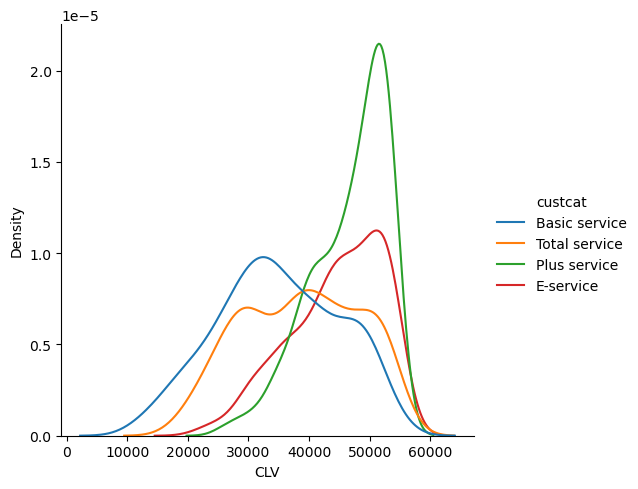

In [19]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='custcat')

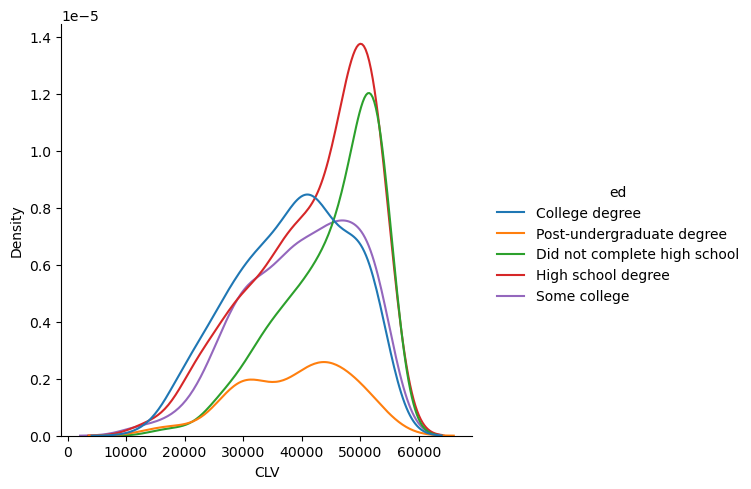

In [20]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='ed')

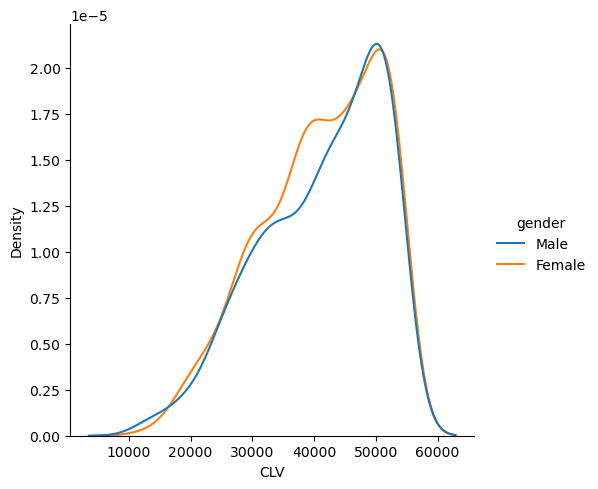

In [21]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='gender')

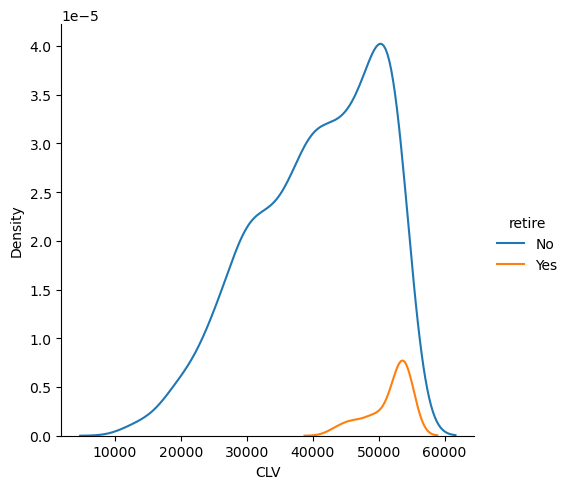

In [22]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='retire')

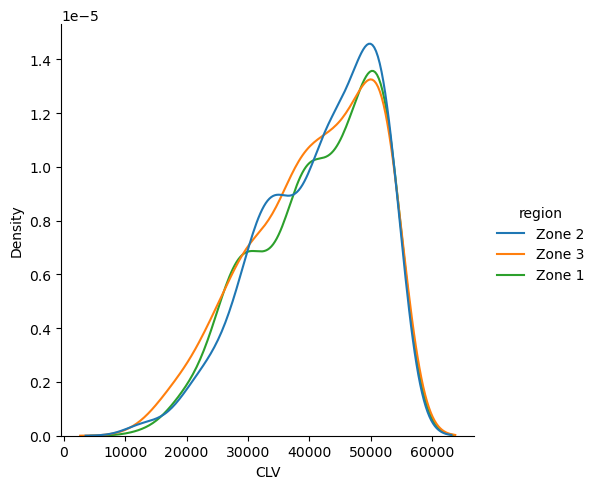

In [23]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='region')

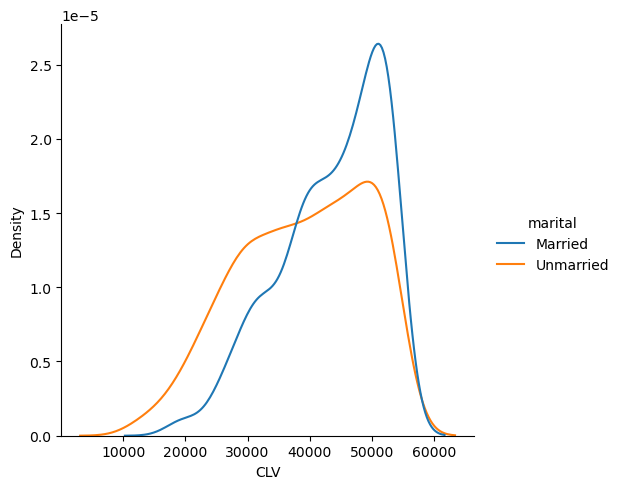

In [24]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='marital')

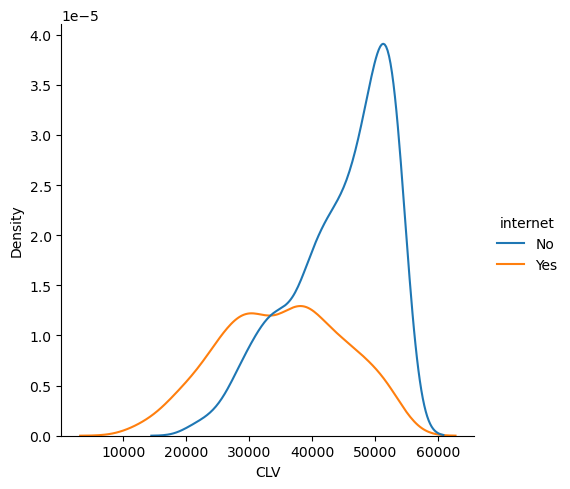

In [25]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='internet')

In [26]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='forward')

NameError: name 'rclvdata' is not defined

In [ ]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='voice')

In [ ]:
sns.displot(data=clvdata, kind='kde', x='CLV', hue='churn')

In [ ]:
print(clvdata.groupby(["gender", "marital", "region"])[["CLV"]].mean())
print(clvdata.groupby(["voice","retire", "ed"] )[["CLV"]].mean())
print(clvdata.groupby("forward")[["CLV"]].mean())
print(clvdata.groupby("internet")[["CLV"]].mean())
print(clvdata.groupby(["marital", "retire"])[["CLV"]].mean())
print(clvdata.groupby(["region", "retire"])[["CLV"]].mean())
print(clvdata.groupby(["custcat", "voice"])[["CLV"]].mean())
print(clvdata.groupby("retire")[["CLV"]].mean())
print(clvdata.groupby(["ed", "marital", "retire"])[["CLV"]].mean())

# Conclusions

Analyzing the provided data reveals interesting insights into customer segments based on various demographic factors and their corresponding Customer Lifetime Value (CLV). The data is segmented by gender, marital status, region, voice service usage, retirement status, education, internet service, and customer category.

- Marital Status, Gender, and Region: Married females, especially in Zone 2, show a higher CLV compared to unmarried females across all zones. For males, married ones in Zone 1 shows the highest CLV. This suggests that married individuals, particularly in certain regions, are more valuable customers.

- Retirement Status and Education: Retired individuals: those who did not complete high school show high CLVs. This could be due to their stable lifestyle and possibly lower inclination to change service providers.

- Voice Service and Education: Customers without voice services who have not completed high school or are retired with some college education have higher CLVs. This indicates a segment less inclined towards additional services but loyal to the basic offerings.

- Internet Service: Customers without internet services have a significantly higher CLV than those with internet. This might point to issues with the internet service leading to lower satisfaction and CLV.

- Retirement Impact: Non-retired individuals have a lower CLV compared to retired ones, indicating that retirees form a more loyal and valuable customer base.

- Education, Marital Status, and Retirement: Segments based on education, marital status, and retirement status show varied CLVs. Notably, married individuals who did not complete high school and are retired have the highest CLV, suggesting a niche but highly valuable segment.

## Retention budget

Taking some arbitrary values for retention rate and cost per customer

In [ ]:
significant_data["CLV"] = clv_data.CLV

In [ ]:
retained_customers = significant_data[significant_data['churn'] == 0]
retained_clv = retained_customers['CLV'].sum()

In [ ]:
retention_rate = 0.8
cost_per_customer = 5000
retention_cost = len(significant_data) * retention_rate * cost_per_customer

In [ ]:
annual_budget = retained_clv - retention_cost
annual_budget

# Scaling the features

I will scale the data using MinMaxScaler and try the same experiment to see the differences.